In [1]:
%matplotlib inline
# %load kerass_conv.py

from __future__ import print_function
import matplotlib
matplotlib.use('Agg')

import sys
import keras
# from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.datasets import fetch_mldata
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(threshold=np.nan)
mnist = fetch_mldata('MNIST original')

batch_size = 1000
num_classes = 10
epochs = 100

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
X, y = mnist["data"], mnist["target"]
x_train, x_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
x_train = x_train/255
x_test = x_test/255
# print(x_train.shape,y_train.shape,x_test.shape)


/home/harsh/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/harsh/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/harsh/tensorflow/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/harsh/tensorflow/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/hom

In [2]:
## TRAINING DATA MODIFICATION
print('Training Details')
temp = x_train[np.where(y_train == 0)]
temp = np.reshape(temp,(-1,28,28))

temp1 = np.zeros((5923,30,30))
temp1[:,:28,:28] = temp
x_train_new = temp1

temp = x_train[np.where(y_train == 1)]
temp = np.reshape(temp,(-1,28,28))

temp1 = np.zeros((6742,30,30))
temp1[:,:28,:28] = temp
x_train_new = np.vstack((x_train_new,temp1))

x_train_new = np.reshape(x_train_new,(12665,30,30,1))
print('x_train shape  -  ',x_train_new.shape)


## TEST DATA MODIFICATION
print('Testing Details')

temp = x_test[np.where(y_test == 0)]
temp = np.reshape(temp,(-1,28,28))

temp1 = np.zeros((temp.shape[0],30,30))
temp1[:,2:30,2:30] = temp
# temp1[:,:28,:28] = temp
x_test_new = temp1

temp = x_test[np.where(y_test == 1)]
temp = np.reshape(temp,(-1,28,28))

temp1 = np.zeros((temp.shape[0],30,30))
# temp1[:,:28,:28] = temp
temp1[:,2:30,2:30] = temp
x_test_new = np.vstack((x_test_new,temp1))
# print(x_test_new.shape)

x_test_new = np.reshape(x_test_new,(x_test_new.shape[0],30,30,1))
print('x_test shape  -  ',x_test_new.shape)

## TRAIN Y DATA MODIFICATION
temp = y_train[np.where(y_train == 0)]
temp1 = y_train[np.where(y_train == 1)]
y_train_new = np.hstack((temp,temp1))
print(y_train_new.shape)


## TEST Y DATA MODIFICATION
temp = y_test[np.where(y_test == 0)]
temp1 = y_test[np.where(y_test == 1)]
y_test_new = np.hstack((temp,temp1))
print(y_test_new.shape)




Training Details
x_train shape  -   (12665, 30, 30, 1)
Testing Details
x_test shape  -   (2115, 30, 30, 1)
(12665,)
(2115,)


y_train =  0.0


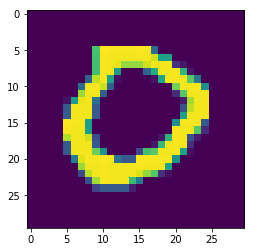

y_test =  1.0


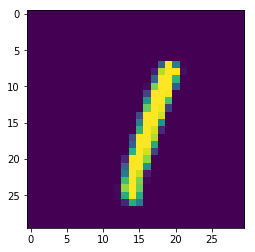

In [3]:
# Pringnting All Details
NumberTrain = 5000

print('y_train = ', y_train[NumberTrain])
plt.figure()
plt.imshow(x_train_new[NumberTrain,:,:,0])
plt.show()

NumberTest = 981
print('y_test = ', y_test[NumberTest])
plt.figure()
plt.imshow(x_test_new[NumberTest,:,:,0])
plt.show()

In [4]:
batch_size = 500
num_classes = 2
epochs = 20

# convert class vectors to binary class matrices
y_train_new = keras.utils.to_categorical(y_train_new, num_classes)
y_test_new = keras.utils.to_categorical(y_test_new, num_classes)


In [5]:
if K.image_data_format() == 'channels_first':
    input_shape = (1, 30, 30)
else:
    input_shape = (30, 30, 1)

In [6]:
model = Sequential()
model.add(Conv2D(10, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape,
                 padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(10, (5, 5), activation='relu',padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(4, (5, 5), activation='relu',padding='same'))
# model.add(MaxPooling2D(pool_size=(6, 6)))
# model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(20, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))
learning_rate = 0.1
# opt = keras.optimizers.Adadelta(lr=learning_rate, rho=0.95, epsilon=None, decay=0.0)
opt = keras.optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# opt = keras.optimizers.Adagrad(lr=learning_rate, epsilon=None, decay=0.0)
# model.compile(loss=keras.losses.categorical_crossentropy,
#               optimizer=opt,
#               metrics=['accuracy'])
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history = model.fit(x_train_new, y_train_new,shuffle=True,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_new, y_test_new))


Train on 12665 samples, validate on 2115 samples
Epoch 1/20
12665/12665 [==============================] - 7s 542us/step - loss: 0.2925 - acc: 0.9343 - val_loss: 0.9301 - val_acc: 0.9319
Epoch 2/20
12665/12665 [==============================] - 6s 506us/step - loss: 0.0314 - acc: 0.9976 - val_loss: 0.5338 - val_acc: 0.9574
Epoch 3/20
12665/12665 [==============================] - 6s 507us/step - loss: 0.0350 - acc: 0.9968 - val_loss: 3.4006 - val_acc: 0.7201
Epoch 4/20
12665/12665 [==============================] - 6s 507us/step - loss: 0.0179 - acc: 0.9981 - val_loss: 1.4393 - val_acc: 0.8678
Epoch 5/20
12665/12665 [==============================] - 6s 513us/step - loss: 0.0154 - acc: 0.9984 - val_loss: 2.2520 - val_acc: 0.7882
Epoch 6/20
12665/12665 [==============================] - 6s 511us/step - loss: 0.0054 - acc: 0.9987 - val_loss: 0.7248 - val_acc: 0.8352
Epoch 7/20
12665/12665 [==============================] - 6s 506us/step - loss: 0.0036 - acc: 0.9991 - val_loss: 0.5274 - v

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        260       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 10)          2510      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 10)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                3220      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 42        
Total para

In [8]:
model.predict_classes([x_test_new[979:981]])

array([0, 1])

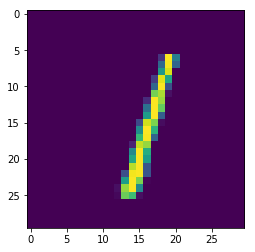

In [9]:
plt.figure()
plt.imshow(x_test_new[980][:,:,0])
plt.show()

In [10]:
from keras.models import Model
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer('max_pooling2d_3').output)


ValueError: No such layer: max_pooling2d_3

In [ ]:
a = intermediate_layer_model.predict([x_test_new[977:983]])

In [ ]:
a